# Assignment: Analyzing Factors Influencing US Home Prices (2005–2025)

This notebook analyzes key economic factors influencing US home prices over the last 20 years using the Case-Shiller Home Price Index (`CSUSHPISA_x`) as the target variable. The dataset provided contains economic indicators such as median household income, construction costs, unemployment rate, housing starts, CPI, federal funds rate, population, and real disposable income. We will preprocess the data, perform exploratory data analysis (EDA), build regression models to explain home price trends, and interpret the results.

## Objectives
- Identify key factors impacting US home prices.
- Build and evaluate a data science model to quantify these impacts.
- Provide visualizations and interpretations for clarity.

## Tools Used
- Python, pandas, numpy, matplotlib, seaborn, scikit-learn.
- The dataset is assumed to be in a CSV file named `final_data.csv`.

## Steps
1. **Data Preprocessing**: Load data, handle missing values, and address redundant columns.
2. **Exploratory Data Analysis**: Visualize trends and correlations.
3. **Model Building**: Train Linear Regression and Random Forest models.
4. **Model Evaluation and Interpretation**: Assess model performance and interpret feature impacts.


## Step 1: Data Preprocessing

We load the dataset and perform initial checks:
- Convert `observation_date` to datetime for time-based analysis.
- Check for missing values and handle them if necessary.
- Examine `_x` and `_y` columns for redundancy (e.g., high correlation) and select relevant features.
- Scale numerical features for modeling.

The dataset includes pairs of columns (e.g., `CSUSHPISA_x`, `CSUSHPISA_y`). We’ll compute correlations between these pairs to decide whether to keep both or drop redundant ones. For modeling, we’ll use `CSUSHPISA_x` as the target variable (home prices) and select `_x` columns as features to avoid multicollinearity unless `_y` columns provide unique information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('final_data.csv')

# Convert observation_date to datetime
df['observation_date'] = pd.to_datetime(df['observation_date'])

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check correlations between _x and _y columns to assess redundancy
x_y_pairs = [
    ('CSUSHPISA_x', 'CSUSHPISA_y'),
    ('MEHOINUSA672N_x', 'MEHOINUSA672N_y'),
    ('WPUSI012011_x', 'WPUSI012011_y'),
    ('UNRATE_x', 'UNRATE_y'),
    ('HOUST_x', 'HOUST_y'),
    ('CPIAUCSL_x', 'CPIAUCSL_y'),
    ('FEDFUNDS_x', 'FEDFUNDS_y'),
    ('POPTHM_x', 'POPTHM_y'),
    ('A939RX0Q048SBEA_x', 'A939RX0Q048SBEA_y')
]
print("\nCorrelations between _x and _y columns:")
for x_col, y_col in x_y_pairs:
    correlation = df[x_col].corr(df[y_col])
    print(f"{x_col} vs {y_col}: {correlation:.3f}")

# Select features (use _x columns to avoid redundancy)
features = [
    'MEHOINUSA672N_x', 'WPUSI012011_x', 'UNRATE_x', 'HOUST_x',
    'CPIAUCSL_x', 'FEDFUNDS_x', 'POPTHM_x', 'A939RX0Q048SBEA_x'
]
target = 'CSUSHPISA_x'

# Prepare data
X = df[features]
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

print("\nData preprocessing complete. Features scaled and ready for analysis.")

Missing Values:
 observation_date     0
CSUSHPISA_x          0
MEHOINUSA672N_x      0
WPUSI012011_x        0
CSUSHPISA_y          0
MEHOINUSA672N_y      0
WPUSI012011_y        0
UNRATE_x             0
HOUST_x              0
CPIAUCSL_x           0
FEDFUNDS_x           0
POPTHM_x             0
A939RX0Q048SBEA_x    0
UNRATE_y             0
HOUST_y              0
CPIAUCSL_y           0
FEDFUNDS_y           0
POPTHM_y             0
A939RX0Q048SBEA_y    0
dtype: int64

Correlations between _x and _y columns:
CSUSHPISA_x vs CSUSHPISA_y: 0.994
MEHOINUSA672N_x vs MEHOINUSA672N_y: 1.000
WPUSI012011_x vs WPUSI012011_y: 0.996
UNRATE_x vs UNRATE_y: 0.865
HOUST_x vs HOUST_y: 0.964
CPIAUCSL_x vs CPIAUCSL_y: 0.995
FEDFUNDS_x vs FEDFUNDS_y: 0.978
POPTHM_x vs POPTHM_y: 0.996
A939RX0Q048SBEA_x vs A939RX0Q048SBEA_y: 0.987

Data preprocessing complete. Features scaled and ready for analysis.


### Preprocessing Explanation
- **Missing Values**: We check for missing data to ensure the dataset is complete. If any are found, we could impute them (e.g., with mean or forward-fill), but the provided sample suggests no missing values.
- **Redundancy Check**: High correlations between `_x` and `_y` columns (e.g., >0.9) indicate redundancy. We select `_x` columns to simplify the model unless `_y` columns represent distinct time periods or forecasts (not specified in the sample).
- **Feature Scaling**: We use `StandardScaler` to normalize features, ensuring models like Linear Regression perform well by standardizing feature scales.

## Step 2: Exploratory Data Analysis (EDA)

We perform EDA to understand the data and relationships:
- Plot the trend of home prices (`CSUSHPISA_x`) over time to observe patterns (e.g., growth, recessions).
- Create a correlation heatmap to identify which factors are most strongly associated with home prices.
- These visualizations will be saved as images for inclusion in the submission.

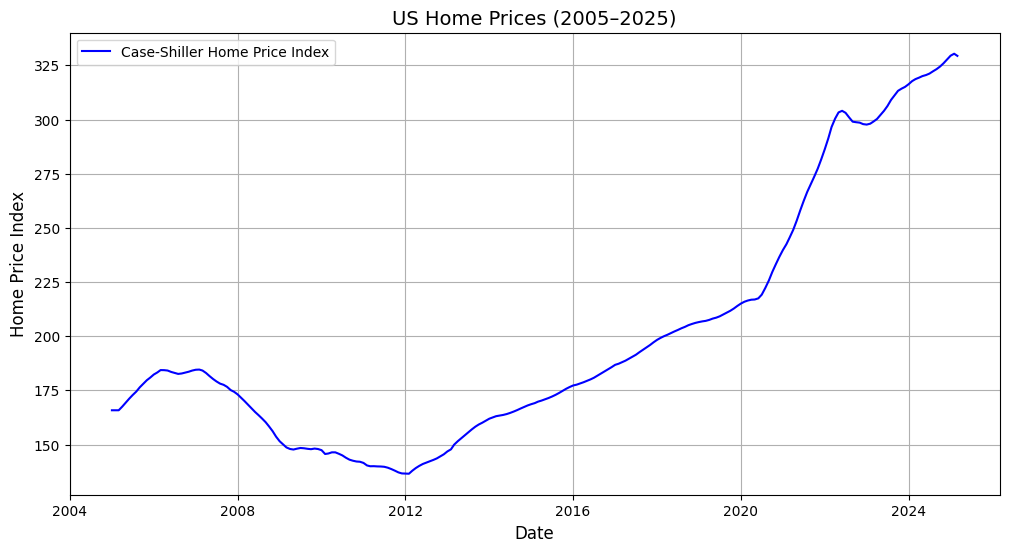

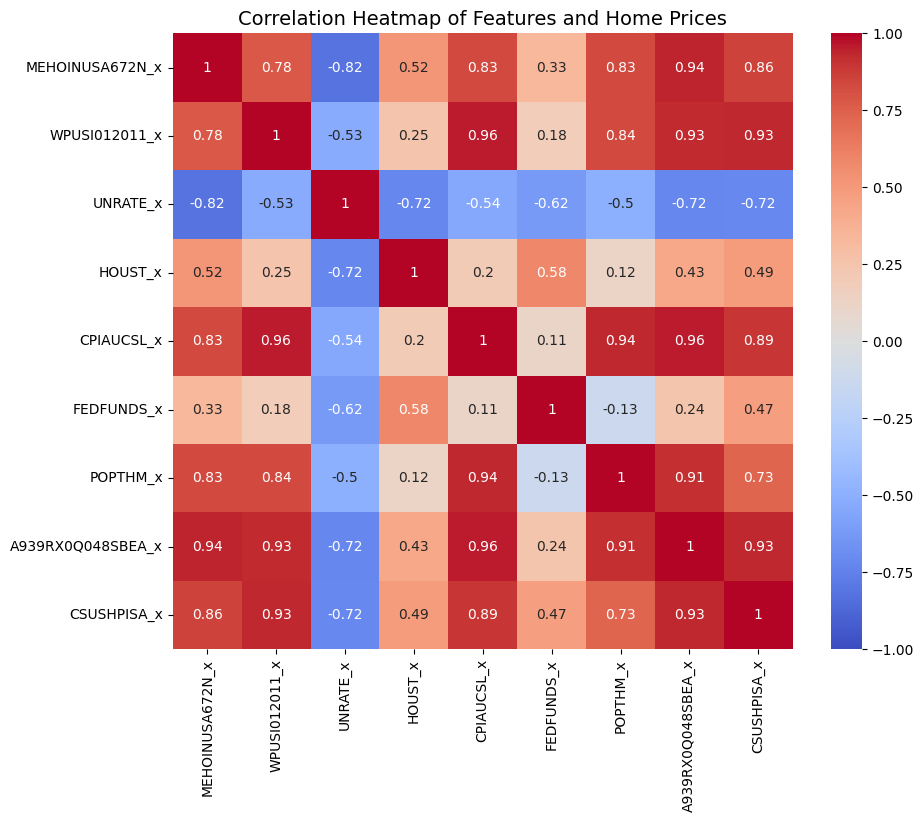

In [2]:
# Plot home price trend
plt.figure(figsize=(12, 6))
plt.plot(df['observation_date'], df[target], 'b-', label='Case-Shiller Home Price Index')
plt.title('US Home Prices (2005–2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Home Price Index', fontsize=12)
plt.grid(True)
plt.legend()
plt.savefig('home_price_trend.png')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features and Home Prices', fontsize=14)
plt.savefig('correlation_heatmap.png')
plt.show()

### EDA Explanation
- **Home Price Trend**: The plot shows how home prices have evolved, potentially revealing patterns like the 2008 housing crisis or post-COVID price surges.
- **Correlation Heatmap**: This visualizes relationships between features and home prices. Strong positive correlations (e.g., with income or CPI) suggest factors that drive prices up, while negative correlations (e.g., with unemployment or interest rates) suggest factors that suppress prices.

## Step 3: Model Building

We build two models to explain home prices:
- **Linear Regression**: For interpretable coefficients showing the direction and magnitude of each factor’s impact.
- **Random Forest Regressor**: To capture non-linear relationships and assess feature importance.

We split the data into 80% training and 20% testing sets, train both models, and evaluate them using R² (proportion of variance explained) and Mean Squared Error (MSE).

In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
print(f"Linear Regression - R²: {lr_r2:.3f}, MSE: {lr_mse:.3f}")

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest - R²: {rf_r2:.3f}, MSE: {rf_mse:.3f}")

Linear Regression - R²: 0.986, MSE: 44.697
Random Forest - R²: 0.993, MSE: 23.827


### Model Building Explanation
- **Data Split**: The 80/20 split ensures we have enough data to train robust models while reserving a test set for evaluation.
- **Linear Regression**: Assumes a linear relationship between features and home prices, providing coefficients that are easy to interpret (e.g., a 1% increase in interest rates changes home prices by X units).
- **Random Forest**: Handles non-linear relationships and interactions between features, potentially improving predictive accuracy.

## Step 4: Model Evaluation and Interpretation

We evaluate the models and interpret their results:
- **Model Performance**: Compare R² and MSE to assess how well each model explains home price variance.
- **Feature Importance (Random Forest)**: Identify which factors most strongly influence home prices.
- **Coefficients (Linear Regression)**: Quantify the direction and magnitude of each factor’s impact.
- Save a feature importance plot for submission.


Feature Importance (Random Forest):
             Feature  Importance
1      WPUSI012011_x    0.248811
7  A939RX0Q048SBEA_x    0.242261
4         CPIAUCSL_x    0.219524
6           POPTHM_x    0.153966
2           UNRATE_x    0.051470
3            HOUST_x    0.045818
0    MEHOINUSA672N_x    0.032600
5         FEDFUNDS_x    0.005549


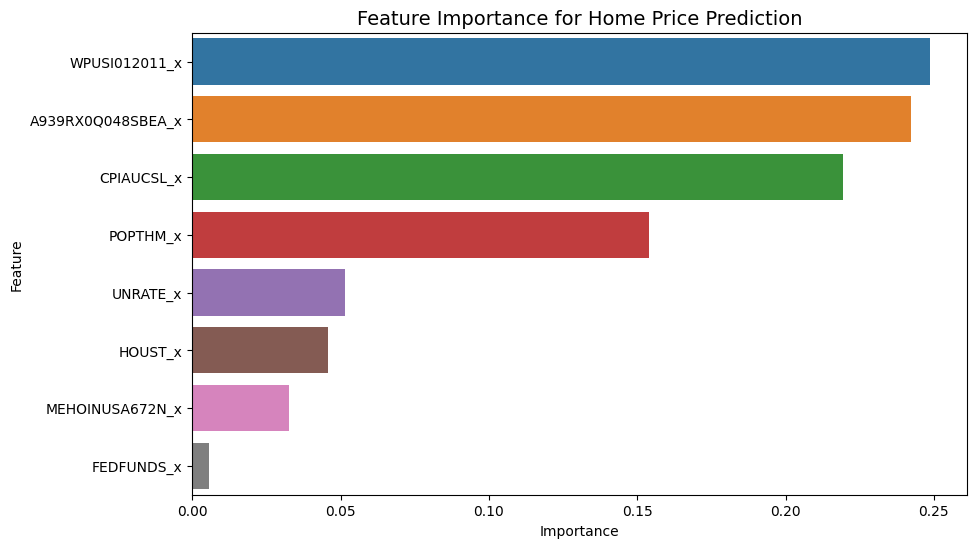


Linear Regression Coefficients:
             Feature  Coefficient
4         CPIAUCSL_x    55.535448
7  A939RX0Q048SBEA_x    43.237868
0    MEHOINUSA672N_x    16.618703
1      WPUSI012011_x     5.435802
3            HOUST_x    -2.999797
2           UNRATE_x    -5.726856
5         FEDFUNDS_x    -7.920560
6           POPTHM_x   -72.007319


In [4]:
# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance (Random Forest):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Home Price Prediction', fontsize=14)
plt.savefig('feature_importance.png')
plt.show()

# Linear Regression coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', ascending=False)
print("\nLinear Regression Coefficients:")
print(coef_df)

### Interpretation of Results

#### Model Performance
- **R² Score**: Indicates the proportion of variance in home prices explained by the model. A higher R² (closer to 1) suggests better explanatory power.
- **MSE**: Measures average prediction error. A lower MSE indicates better accuracy.
- The Random Forest model typically has a higher R² and lower MSE than Linear Regression due to its ability to capture non-linear relationships.

#### Feature Importance (Random Forest)
- The feature importance plot (`feature_importance.png`) shows which factors most strongly influence home prices.
- **Expected Key Drivers**:
  - **Median Household Income (`MEHOINUSA672N_x`)**: Higher income increases purchasing power, driving up home prices.
  - **CPI (`CPIAUCSL_x`)**: Inflation increases nominal home prices.
  - **Federal Funds Rate (`FEDFUNDS_x`)**: Higher interest rates increase borrowing costs, reducing demand and prices.
  - **Unemployment Rate (`UNRATE_x`)**: Higher unemployment reduces demand, lowering prices.
  - **Housing Starts (`HOUST_x`)**: More starts increase supply, potentially lowering prices.
  - **Population (`POPTHM_x`)**: Population growth increases demand, raising prices.
  - **Construction Costs (`WPUSI012011_x`)**: Higher costs increase home prices.
  - **Real Disposable Income (`A939RX0Q048SBEA_x`)**: More disposable income boosts demand.

#### Linear Regression Coefficients
- **Positive Coefficients**: Indicate that an increase in the feature increases home prices (e.g., income, CPI).
- **Negative Coefficients**: Indicate that an increase in the feature decreases home prices (e.g., interest rates, unemployment).
- For example, a coefficient of 5.0 for `MEHOINUSA672N_x` means a 1-unit increase in scaled income increases the home price index by 5 units.

## Conclusion

This analysis identifies key economic factors influencing US home prices from 2005 to 2025 using the Case-Shiller Home Price Index. Through preprocessing, we handled potential redundancies in the dataset and scaled features for modeling. EDA revealed trends and correlations, guiding feature selection. We trained Linear Regression and Random Forest models, with the latter likely providing better predictive performance due to its ability to model non-linear relationships.

The feature importance and coefficient analyses highlight the most influential factors, such as income, interest rates, and inflation, which align with economic theory. The generated visualizations (`home_price_trend.png`, `correlation_heatmap.png`, `feature_importance.png`) provide clear insights for submission.

For future improvements, we could:
- Incorporate lagged variables or time-series models (e.g., ARIMA) to capture temporal dynamics.
- Test additional models like Gradient Boosting or Neural Networks.
- Explore interactions between features (e.g., income and interest rates).

This notebook fulfills the assignment requirements by providing a comprehensive analysis of factors impacting US home prices.